In [1]:
featured_model = 'MEL_Lin_Highres'

In [2]:
from DataLoad import load_to_dataframe
df, df_raw, class_dict = load_to_dataframe()

In [3]:
from feature_generator import create_features
features, labels = create_features(df_raw, featured_model + ".txt")

Create MEL Bins with linear loudness values
Hop_length:  1024
Sampling Rate: 44100
Fast Fourier Window: 1024
Number of MEL Bins: 128
Shape of Feature:  [128, 130, 1]
Minimum Frequency:  0.0
Maximum Frequency:  11025.0


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size=0.3)

In [41]:
from BatchGenerators import SoundSequence
batch_size = 10
train_gen = SoundSequence(X_train, y_train, batch_size)
test_gen = SoundSequence(X_test, y_test, batch_size)

In [ ]:
train_gen[0]

In [7]:
features.shape

(6705, 128, 130, 1)

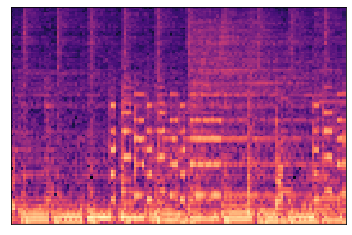

In [36]:
import librosa.display
import numpy as np
mel = features[8].squeeze()
mel_db = librosa.power_to_db(mel, ref=np.max)
librosa.display.specshow(mel)

In [42]:
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, SpatialDropout2D

num_filters = 8
filter_size = 3

model = models.Sequential()
#model.add(layers.Conv1D(1, kernel_size = 200, input_shape=(13299,1))) #
model.add(layers.Conv2D(32,(4,4), activation="relu", input_shape=(X_train.shape[1:])))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(LSTM(64))
model.add(layers.Conv2D(64, (4,4), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (4, 4), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.SpatialDropout2D(0.5))
#model.add(layers.Dropout(0.5))
model.add(layers.Flatten())
model.add(layers.Dense(11, activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 125, 127, 32)      544       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 62, 63, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 59, 60, 64)        32832     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 29, 30, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 27, 128)       131200    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
spatial_dropout2d_2 (Spatial (None, 13, 13, 128)      

In [43]:
optimizer = 'adam'
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [44]:
epochs = 20
history = model.fit(
    train_gen,
#    steps_per_epoch=30,
    epochs=epochs,
    validation_data=test_gen,
#    validation_steps=30
    )

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 470 steps, validate for 202 steps
Epoch 1/20
470/470 [==============================] - 92s 196ms/step - loss: 2.3227 - accuracy: 0.1647 - val_loss: 2.2816 - val_accuracy: 0.2117
Epoch 2/20
470/470 [==============================] - 98s 209ms/step - loss: 2.2338 - accuracy: 0.2169 - val_loss: 2.2038 - val_accuracy: 0.2306
Epoch 3/20
470/470 [==============================] - 97s 207ms/step - loss: 2.1498 - accuracy: 0.2487 - val_loss: 2.1478 - val_accuracy: 0.2858
Epoch 4/20
470/470 [==============================] - 84s 178ms/step - loss: 2.0841 - accuracy: 0.2913 - val_loss: 2.1069 - val_accuracy: 0.2818
Epoch 5/20
470/470 [==============================] - 84s 180ms/step - loss: 2.0189 - accuracy: 0.3098 - val_loss: 2.0499 - val_accuracy: 0.3067
Epoch 6/20
470/470 [==============================] - 79s 167ms/step - loss: 1.9290 - accuracy: 0.3495 - val_loss: 1.9785 - val_accuracy: 0.3300
Epoch 7/20
470/470 [================

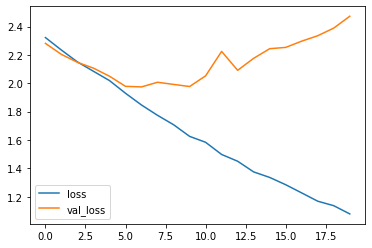

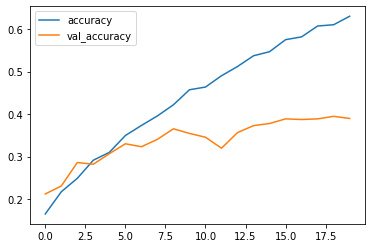

In [45]:
from PlotModel import plot_model_history
plot_model_history(model)

In [46]:
model.save('saved_models/' + featured_model + ".mdl") 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_models/MEL_Lin_Highres.mdl/assets
